In [ ]:
#Downloading the Dataset
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/2637/4381/mbti_1.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561827680&Signature=FuZVxTRJq8XHy3Zs2m7Khiac2S2SuYLxNd8fTgqmpFqGqlwwQrQEnBk4bamd6CA1cTSToRFwn8bAqPEatCbaSBmqdSX7K3FcTUid9LEkwQZNq7Yxj0NcV3trg%2FXPMXbtvwhK34wq2UgDmH0hXyOo8kcha6t%2Fc1p87jajs%2BYqJT4NLdbBxlY4n%2FOsZTkfP3%2FNBuBXDdTIjR%2BKeKRLTz4LDB%2BItuMImn%2BNHavJv%2Fw0u1mYg5yrS%2FV2JM%2F%2FHVDbApthmEo5awR5U1H2VwEe6NZNKEaHLz21wVNt3WC0OTHdF7ggAv6X4DQzymh2xhkvsuh0c5HTdJKfwGKwYDTZb14X7w%3D%3D"\
      -O "/tmp/mbti.zip"

--2019-06-27 13:32:23--  https://storage.googleapis.com/kaggle-datasets/2637/4381/mbti_1.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561827680&Signature=FuZVxTRJq8XHy3Zs2m7Khiac2S2SuYLxNd8fTgqmpFqGqlwwQrQEnBk4bamd6CA1cTSToRFwn8bAqPEatCbaSBmqdSX7K3FcTUid9LEkwQZNq7Yxj0NcV3trg%2FXPMXbtvwhK34wq2UgDmH0hXyOo8kcha6t%2Fc1p87jajs%2BYqJT4NLdbBxlY4n%2FOsZTkfP3%2FNBuBXDdTIjR%2BKeKRLTz4LDB%2BItuMImn%2BNHavJv%2Fw0u1mYg5yrS%2FV2JM%2F%2FHVDbApthmEo5awR5U1H2VwEe6NZNKEaHLz21wVNt3WC0OTHdF7ggAv6X4DQzymh2xhkvsuh0c5HTdJKfwGKwYDTZb14X7w%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26387746 (25M) [application/octet-stream]
Saving to: ‘/tmp/mbti.zip’

/tmp/mbti.zip       100%[===================>]  25.17M  76.0MB/s    in 0.3s    

2019-06-27 13:32:24 (76.0 MB/s) - ‘/t

In [ ]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/mbti.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/mbti')
zip_ref.close()

In [ ]:
#Functions for Preprocessing the Dataset
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


def mystopwords(text):
    return ' '.join([w for w in word_tokenize(text) if not w in stop_words])

import re
def clean_text(string):
  clean=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',string) #remove url
  clean=re.sub('[\n]',' ',clean) #remove newline character
  clean=re.sub('[^a-zA-Z]',' ',clean.lower()) #remove non alphabetic characters
  clean=mystopwords(clean) #remove stopwords
  return clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Loading the Dataset
import pandas as pd
df=pd.read_csv('/tmp/mbti/mbti_1.csv')

In [ ]:
df.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
#Cleaning the data 
data=[]
for i in range(len(df)):
  l=[]
  l.append(df['type'][i])
  l.append(clean_text(df['posts'][i]))
  data.append(l)

In [ ]:
#Suffling the data and splitting the data into train and test sets (90:10)
import random
suffled_set=random.sample(data,len(data))
train_len=int(len(suffled_set)*0.9)
train=suffled_set[:train_len]
test=suffled_set[train_len:]

In [ ]:
#Data Summary
print('Length of the Data: ',len(df))
print('No. of Training Examples: ',len(train))
print('No. of Test Examples: ',len(test))
print('No. of Classes: ',df['type'].nunique())

Length of the Data:  8675
No. of Training Examples:  7807
No. of Test Examples:  868
No. of Classes:  16


In [ ]:
#Separating the personality types (labels) and the posts
train_sentences=[]
test_sentences=[]
train_labels=[]
test_labels=[]
labels=[]
sentences=[]

for i in range(len(train)):
  train_labels.append(train[i][0])
  train_sentences.append(train[i][1])

for i in range(len(test)):
  test_labels.append(test[i][0])
  test_sentences.append(test[i][1])

for i in range(len(suffled_set)):
  labels.append(suffled_set[i][0])
  sentences.append(suffled_set[i][1])

In [ ]:
#Tokenization and Padding
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

embedding_dim = 300
max_length = 900
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
vocab_len=19999


tokenizer = Tokenizer(num_words=vocab_len+1,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Original Size of Vocabulary: ',vocab_size)

word_index = {e:i for e,i in word_index.items() if i <= vocab_len+1} #Reducing the Size of Vocabulary
print('New Size of Vocabulary: ',len(word_index))

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#Label Encoding the labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels=le.transform(train_labels) 
le.fit(test_labels)
test_labels=le.transform(test_labels) 
le.fit(labels)
labels=le.transform(labels) 

train_labels=np.expand_dims(train_labels, axis=1)
test_labels=np.expand_dims(test_labels, axis=1)
labels=np.expand_dims(labels, axis=1)


Original Size of Vocabulary:  96787
New Size of Vocabulary:  20000


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Dimension of Data after Tokenizing and Padding
print('Dimension of Training Data: ',train_padded.shape)
print('Dimension of Test Data: ',test_padded.shape)
print('Dimension of Training Labels: ',train_labels.shape)
print('Dimension of Test Labels: ',test_labels.shape)
print('Dimension of Data: ',padded.shape)
print('Dimension of Labels: ',labels.shape)

Dimension of Training Data:  (7807, 900)
Dimension of Test Data:  (868, 900)
Dimension of Training Labels:  (7807, 1)
Dimension of Test Labels:  (868, 1)
Dimension of Data:  (8675, 900)
Dimension of Labels:  (8675, 1)


In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzipping the fasttext pretrained model from Google Drive
import os
import zipfile

local_zip='/content/drive/My Drive/crawl-300d-2M.vec.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/crawl-300d-2M.vec')
zip_ref.close()

In [ ]:
# Loading the pretrained vectors
embeddings_index = {}
import numpy as np
with open('/content/drive/My Drive/crawl-300d-2M.vec/crawl-300d-2M.vec') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
# Creating an embedding matrix that contains the vectors of the words in the MBTI dataset
embeddings_matrix = np.zeros((vocab_len+2, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector
        

In [ ]:
#embeddings_matrix=np.delete(embeddings_matrix, 1, 0)
embeddings_matrix.shape

(15000, 300)

In [ ]:
print('Shape of embeddings matrix: ',embeddings_matrix.shape)

Shape of embeddings matrix:  (15000, 300)


# Convolutional Neural Network (CNN)

In [ ]:
#from keras.regularizers import l2
#Building the CNN Model
model_conv = tf.keras.Sequential([
    #tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length, weights = [embeddings_matrix], trainable = False),
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='softmax')
])

In [ ]:
model_conv.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 900, 300)          6000000   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 898, 64)           57664     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 449, 64)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 447, 128)          24704     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 223, 128)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 223, 128)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 28544)            

In [ ]:
model_conv.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history=model_conv.fit(train_padded, train_labels, epochs=num_epochs, validation_split=0.2)

Train on 6245 samples, validate on 1562 samples
Epoch 1/10
6245/6245 [==============================] - 7s 1ms/sample - loss: 2.1773 - acc: 0.2802 - val_loss: 1.8369 - val_acc: 0.4725
Epoch 2/10
6245/6245 [==============================] - 6s 961us/sample - loss: 1.5278 - acc: 0.5520 - val_loss: 1.6457 - val_acc: 0.5134
Epoch 3/10
6245/6245 [==============================] - 6s 966us/sample - loss: 0.8086 - acc: 0.7620 - val_loss: 1.7981 - val_acc: 0.5256
Epoch 4/10
6245/6245 [==============================] - 6s 967us/sample - loss: 0.3371 - acc: 0.8985 - val_loss: 2.2557 - val_acc: 0.5314
Epoch 5/10
6245/6245 [==============================] - 6s 964us/sample - loss: 0.1611 - acc: 0.9521 - val_loss: 2.6057 - val_acc: 0.5186
Epoch 6/10
6245/6245 [==============================] - 6s 961us/sample - loss: 0.0980 - acc: 0.9721 - val_loss: 3.1777 - val_acc: 0.5102
Epoch 7/10
6245/6245 [==============================] - 6s 961us/sample - loss: 0.0734 - acc: 0.9773 - val_loss: 4.0419 - val_

<Figure size 432x288 with 0 Axes>

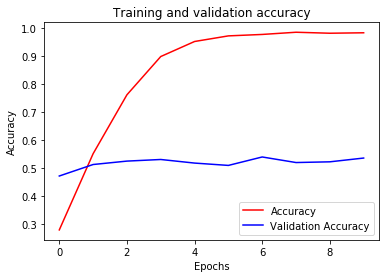

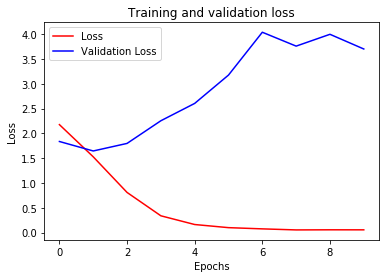

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

# **We can see that while the training  accuracy is close to 100%, validation accuracy is just around 50%. Lets find out why!**

In [ ]:
score, acc = model_conv.evaluate(test_padded, test_labels, verbose=2)
print('Test accuracy:', acc)

868/868 - 0s - loss: 3.8134 - acc: 0.5300
Test accuracy: 0.5299539


In [ ]:
pred_prob_test_labels=model_conv.predict(test_padded)

pred_test_labels=[]
for i in range(len(pred_prob_test_labels)):
  pred_test_labels.append(np.argmax(pred_prob_test_labels[i]))  

In [ ]:
pred_test_labels=np.array(pred_test_labels)
true_test_labels=np.squeeze(test_labels, axis=1)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(true_test_labels, pred_test_labels)
print('Cohen Score: ',cohen_score)

Cohen Score:  0.4052703219392827


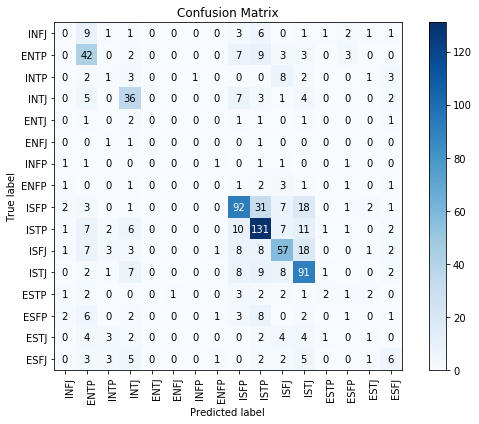

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    """if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)"""

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(true_test_labels, pred_test_labels, classes=df['type'].unique(),
                      title='Confusion Matrix')


Text(0.5, 1.0, 'Personality Types Distribution')

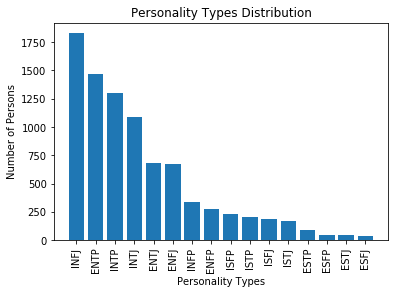

In [ ]:
%matplotlib inline

y=df['type'].value_counts()
x=df['type'].unique()
plt.bar(x, y, width=0.8, bottom=None, align='center', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Personality Types')
plt.ylabel('Number of Persons')
plt.title('Personality Types Distribution')

# **It is apparent from the graph above that there is severe class imbalance problem with the dataset.**

**Let us try a sampling technique to remove class imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(train_padded, train_labels)
print(X_sm.shape, y_sm.shape)

(9427, 900) (9427,)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced' ,np.unique(train_labels) ,np.squeeze(train_labels, axis=1))
history= model_conv.fit(X_sm, y_sm,
                    epochs=20,
                    verbose=2,
                    validation_split=0.2)

Train on 7541 samples, validate on 1886 samples
Epoch 1/20
7541/7541 - 7s - loss: 0.5263 - acc: 0.8862 - val_loss: 7.7465 - val_acc: 0.0753
Epoch 2/20
7541/7541 - 7s - loss: 0.1217 - acc: 0.9653 - val_loss: 11.4337 - val_acc: 0.0695
Epoch 3/20
7541/7541 - 7s - loss: 0.0432 - acc: 0.9883 - val_loss: 11.8872 - val_acc: 0.0737
Epoch 4/20
7541/7541 - 7s - loss: 0.0281 - acc: 0.9932 - val_loss: 13.1709 - val_acc: 0.0668
Epoch 5/20
7541/7541 - 7s - loss: 0.0226 - acc: 0.9923 - val_loss: 12.7929 - val_acc: 0.0758
Epoch 6/20
7541/7541 - 7s - loss: 0.0336 - acc: 0.9895 - val_loss: 12.7514 - val_acc: 0.0716
Epoch 7/20
7541/7541 - 7s - loss: 0.0392 - acc: 0.9881 - val_loss: 13.8635 - val_acc: 0.0705
Epoch 8/20
7541/7541 - 7s - loss: 0.0505 - acc: 0.9817 - val_loss: 12.2858 - val_acc: 0.0764
Epoch 9/20
7541/7541 - 7s - loss: 0.0540 - acc: 0.9818 - val_loss: 16.9328 - val_acc: 0.0710
Epoch 10/20
7541/7541 - 7s - loss: 0.0609 - acc: 0.9814 - val_loss: 14.3839 - val_acc: 0.0732
Epoch 11/20
7541/7541 

In [ ]:
score, acc = model_conv.evaluate(test_padded, test_labels, verbose=2)
print('Test accuracy:', acc)

868/868 - 0s - loss: 5.5961 - acc: 0.5449
Test accuracy: 0.5449309


In [ ]:
pred_prob_test_labels_new=model_conv.predict(test_padded)

pred_test_labels_new=[]
for i in range(len(pred_prob_test_labels_new)):
  pred_test_labels_new.append(np.argmax(pred_prob_test_labels_new[i]))  
pred_test_labels_new=np.array(pred_test_labels_new)
true_test_labels=np.squeeze(test_labels, axis=1)
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(true_test_labels, pred_test_labels_new)
print('Cohen Score: ',cohen_score)

Cohen Score:  0.4726585631076323


**We can see that after using a sampling technique, the validation accuracy was abysmal. However, the test accuracy improved by around 1.5% and Cohen score improved by around 7%**

**Let's try some traditional ML algorithms**

# **Multinomial Naive Bayes Classifier**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',MultinomialNB())
                   ])


In [ ]:
pipeline.fit(train_sentences,train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x7ff11a1e4158>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pred=pipeline.predict(test_sentences)

In [ ]:
from sklearn.metrics import accuracy_score
print('Test Accuracy using MultiNomial Naive Bayes Classifier: ',accuracy_score(test_labels,pred))

Test Accuracy using MultiNomial Naive Bayes Classifier:  0.20622119815668202


# **Support Vector Machines**

In [ ]:
from sklearn.svm import SVC
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',SVC())
                   ])


In [ ]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(test_sentences)
from sklearn.metrics import accuracy_score
print('Test Accuracy using Support Vector Machines: ',accuracy_score(test_labels,pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test Accuracy using Support Vector Mchines:  0.20622119815668202


# **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',RandomForestClassifier(n_estimators=600))
                   ])

In [ ]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(test_sentences)
from sklearn.metrics import accuracy_score
print('Test Accuracy using Random Forest Classifier: ',accuracy_score(test_labels,pred))

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Test Accuracy using Random Forest Classifier:  0.27880184331797236
